**Imported libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Import Dataset**

In [2]:
df = pd.read_csv("/content/Advertising.csv")


**Pre-processing**

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
print("Number of rows: ",df.shape[0])
print("Number of column: ",df.shape[1])

Number of rows:  200
Number of column:  5


In [6]:
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [12]:
df=df.drop(columns=['Unnamed: 0'])

In [13]:
df.head(2)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


**Analysis**

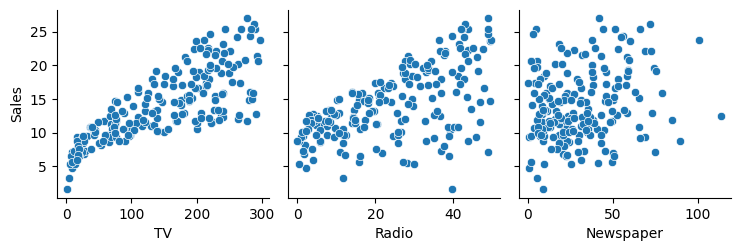

In [14]:
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter')


 *through this pair plot observation we can conclude that as the advertisment increases the sales for TV also increase but data fot Radio and Newspaper is unpredictable*

**Data Corelation**

<Axes: >

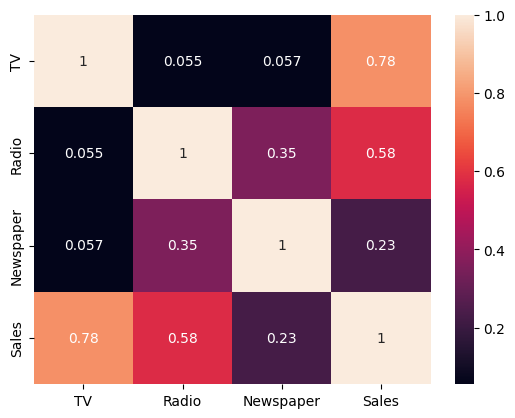

In [15]:
sns.heatmap(df.corr(),annot=True)

In [16]:
x=df['TV']
y=df['Sales']

**spliting the data**

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3, random_state=100)

In [18]:

x_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [19]:
y_train.head()

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: Sales, dtype: float64

In [20]:
x_test.head()

126      7.8
104    238.2
99     135.2
92     217.7
111    241.7
Name: TV, dtype: float64

In [21]:
y_test.head()

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
Name: Sales, dtype: float64

**Model Training**

In [22]:
import statsmodels.api as sm

In [23]:
#add constant to get an intercpt
x_train_sm=sm.add_constant(x_train)

In [24]:
lr=sm.OLS(y_train, x_train_sm).fit()

In [25]:
lr.params

const    6.989666
TV       0.046497
dtype: float64

In [26]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           2.84e-30
Time:                        11:52:54   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

coffecient for TV=0.046

R-squared is 0.613

F-statistic:    219.0

SALES=6.9896+ 0.046*TV

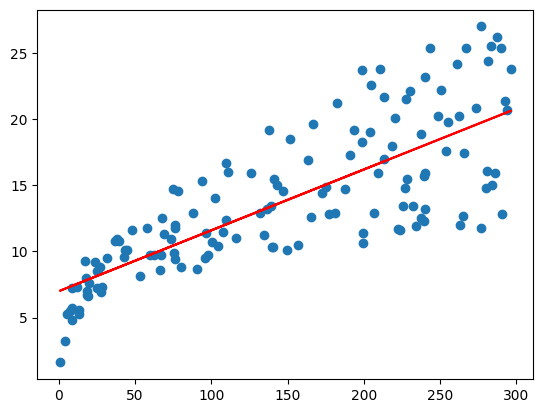

In [27]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.9896+ 0.046*x_train,'r')
plt.show()

**MODEL EVALUATION**

In [28]:
y_train_pred=lr.predict(x_train_sm)
res=(y_train - y_train_pred)

<ipython-input-30-f47289c84d1e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


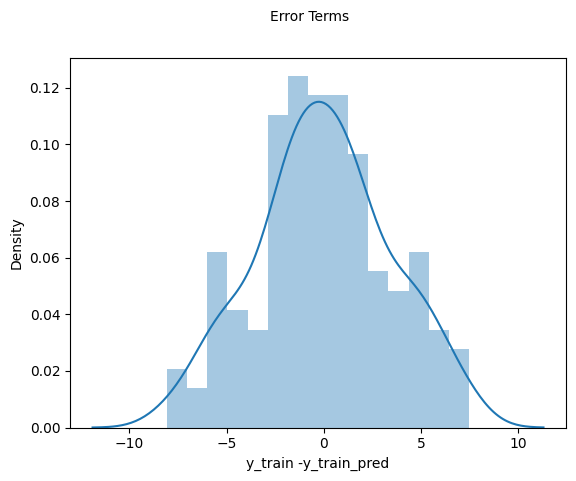

In [30]:
fig=plt.figure()
sns.distplot(res, bins=15)
fig.suptitle('Error Terms', fontsize=10)
plt.xlabel('y_train -y_train_pred',fontsize=10)
plt.show()

**Pattern residual**

<function matplotlib.pyplot.show(close=None, block=None)>

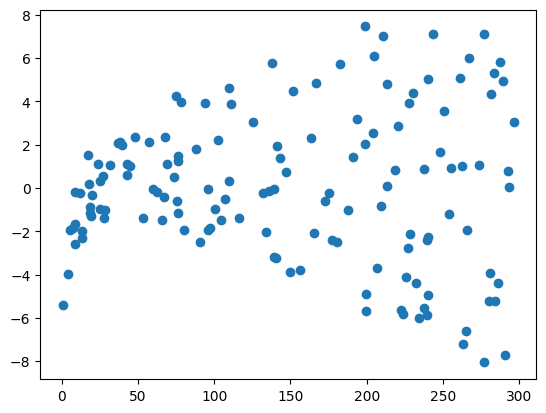

In [31]:
plt.scatter(x_train,res)
plt.show

**Prediction on the test set**

In [32]:
#add a const to x_test
x_train_sm=sm.add_constant(x_test)


In [33]:
x_test_sm=sm.add_constant(x_test)

In [34]:
#pred y value corresponding  to x_test_sm
y_pred=lr.predict(x_test_sm)

In [35]:
y_pred.head()

126     7.352345
104    18.065337
99     13.276109
92     17.112141
111    18.228077
dtype: float64

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

**RMSE**

In [37]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.8241456288327003

In [38]:
#checking r-squared on the test set
r_squared = r2_score(y_test,y_pred)

In [39]:
r_squared

0.5942987267783303

**Visualizing the fit on the test set**

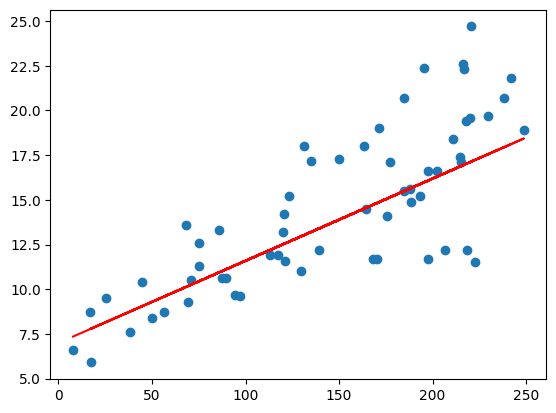

In [40]:
plt.scatter(x_test,y_test)
plt.plot(x_test, 6.9896+ 0.046*x_test,'r')
plt.show()